Degree 1 Model -> Test R^2 Score: 0.8832
Degree 2 Model -> Test R^2 Score: 0.9231


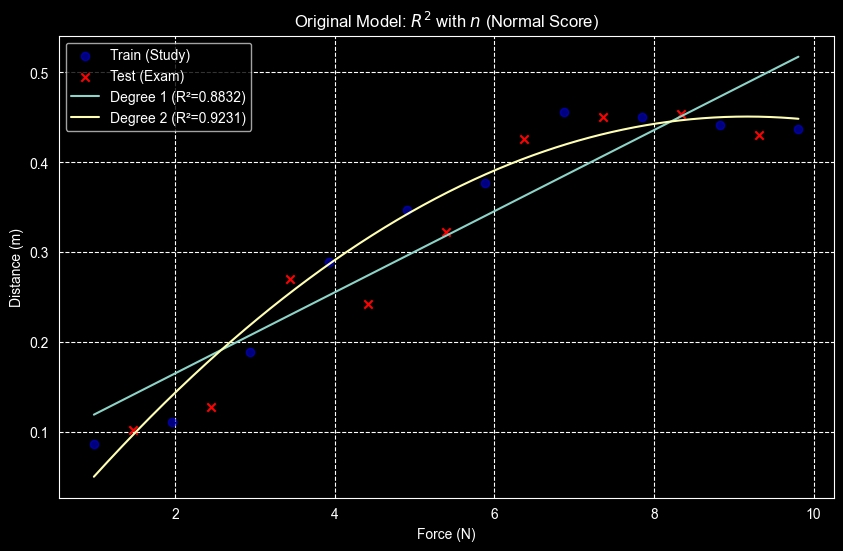

In [12]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):

    SSE = ((predicted - observed)**2).sum()
    MSE = SSE / len(observed)
    VAR = np.var(observed)
    return 1 - (MSE/VAR)

def split_and_test(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    train_forces, train_dist = forces[0::2], distances[0::2]
    test_forces, test_dist = forces[1::2], distances[1::2]

    # 1. 그래프 도화지 준비
    plt.figure(figsize=(10, 6))
    plt.scatter(train_forces, train_dist, color='blue', label='Train (Study)', alpha=0.5)
    plt.scatter(test_forces, test_dist, color='red', marker='x', label='Test (Exam)')

    # 선을 매끄럽게 그리기 위한 범위 설정
    x_range = np.linspace(min(forces), max(forces), 500)

    degrees = [1, 2] # 1차 vs 2차

    for d in degrees:
        model = np.polyfit(train_forces, train_dist, d)
        est_test_dist = np.polyval(model, test_forces)

        # 성적 계산 (정상적인 R^2)
        r2 = rSquared(test_dist, est_test_dist)
        print(f"Degree {d} Model -> Test R^2 Score: {r2:.4f}")

        # 2. 모델의 예측선 그리기
        y_range = np.polyval(model, x_range)
        plt.plot(x_range, y_range, label=f'Degree {d} (R²={r2:.4f})')

    plt.title('Original Model: $R^2$ with $n$ (Normal Score)')
    plt.xlabel('Force (N)')
    plt.ylabel('Distance (m)')
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()

split_and_test('springData.csv')


Degree 1 Model -> Test R^2 Score (Exp 1): -0.0511
Degree 2 Model -> Test R^2 Score (Exp 1): 0.3075


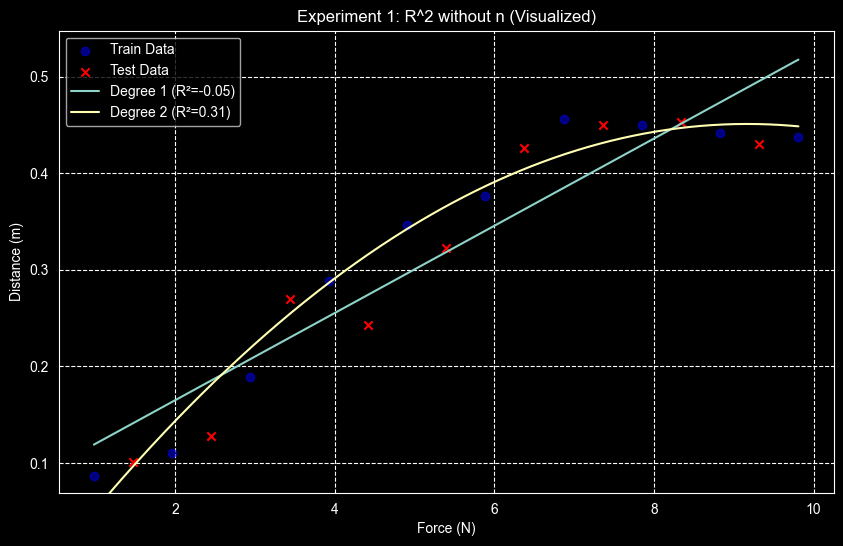

original R^2 Score-> exp 1 R^2 Score 
Dg1 Model : 0.8832 -> -0.0511
Dg2 Model : 0.9231 -> 0.3075


In [11]:
#exp 1 : Del len(observed)

import pylab
import numpy as np
import matplotlib.pyplot as plt #
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):

    SSE = ((predicted - observed)**2).sum()
    MSE = SSE
    VAR = np.var(observed)
    return 1 - (MSE/VAR)

def split_and_test(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    train_forces, train_dist = forces[0::2], distances[0::2]
    test_forces, test_dist = forces[1::2], distances[1::2]

    # 2. 그래프 기본 설정
    plt.figure(figsize=(10, 6))
    plt.scatter(train_forces, train_dist, color='blue', label='Train Data', alpha=0.5)
    plt.scatter(test_forces, test_dist, color='red', marker='x', label='Test Data')

    # 선을 부드럽게 그리기 위한 x축 범위 생성
    x_range = np.linspace(min(forces), max(forces), 500)

    degrees = [1, 2]

    for d in degrees:
        model = np.polyfit(train_forces, train_dist, d)
        est_test_dist = np.polyval(model, test_forces)

        # 성적 매기기 (n이 빠진 rSquared)
        r2 = rSquared(test_dist, est_test_dist)
        print(f"Degree {d} Model -> Test R^2 Score (Exp 1): {r2:.4f}")

        # 3. 그래프 선 추가
        y_range = np.polyval(model, x_range)
        plt.plot(x_range, y_range, label=f'Degree {d} (R²={r2:.2f})')

    plt.ylim(min(distances)*0.8, max(distances)*1.2)
    plt.title('Experiment 1: R^2 without n (Visualized)')
    plt.xlabel('Force (N)')
    plt.ylabel('Distance (m)')
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()

split_and_test('springData.csv')


#result:
print('original R^2 Score-> exp 1 R^2 Score ')
print(f'Dg1 Model : 0.8832 -> -0.0511' )
print(f'Dg2 Model : 0.9231 -> 0.3075')

Degree 1 Model -> Test R^2 Score: 0.8832
Degree 2 Model -> Test R^2 Score: 0.9231
Degree 15 Model -> Test R^2 Score: 0.4204


/var/folders/v2/qcl4g7092plf3rbt5094xjrh0000gn/T/ipykernel_44754/1244625559.py:42: RankWarning: Polyfit may be poorly conditioned
  model = np.polyfit(train_forces, train_dist, d)


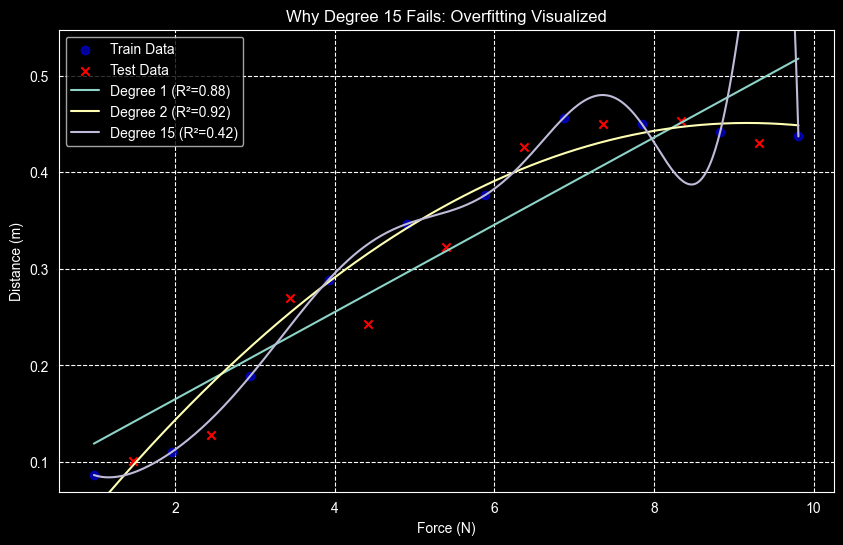

original R^2 Score-> exp 1 R^2 Score 
Dg1 Model : 0.8832 -> -0.0511
f Dg2 Model : 0.9231 -> 0.3075
f Dg15 Model : 0.4204, & RankWarning: Polyfit may be poorly conditioned model = np.polyfit(train_forces, train_dist, d) => overfitting


In [10]:
#exp 2 : New Degrees [1,2,15]

import pylab
import numpy as np
import matplotlib.pyplot as plt

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):
    SSE = ((predicted - observed)**2).sum()
    MSE = SSE/len(observed)
    VAR = np.var(observed)
    return 1 - (MSE/VAR)

def split_and_test(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 데이터 분할
    train_forces, train_dist = forces[0::2], distances[0::2]
    test_forces, test_dist = forces[1::2], distances[1::2]

    # 그래프 설정을 위한 가상 데이터 (부드러운 곡선을 위해)
    x_range = np.linspace(min(forces), max(forces), 500)
    plt.figure(figsize=(10, 6))
    plt.scatter(train_forces, train_dist, color='blue', label='Train Data', alpha=0.6)
    plt.scatter(test_forces, test_dist, color='red', marker='x', label='Test Data')

    degrees = [1, 2, 15]

    for d in degrees:
        # [학습] Training 데이터로 모델 생성
        model = np.polyfit(train_forces, train_dist, d)

        # [검증] Test 데이터로 예측값 생성
        est_test_dist = np.polyval(model, test_forces)

        # 점수 매기기 (Test R^2)
        r2 = rSquared(test_dist, est_test_dist)
        print(f"Degree {d} Model -> Test R^2 Score: {r2:.4f}")

        # 그래프 그리기
        y_range = np.polyval(model, x_range)
        plt.plot(x_range, y_range, label=f'Degree {d} (R²={r2:.2f})')

    plt.ylim(min(distances)*0.8, max(distances)*1.2)
    plt.title('Why Degree 15 Fails: Overfitting Visualized')
    plt.xlabel('Force (N)')
    plt.ylabel('Distance (m)')
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()

# 실행
split_and_test('springData.csv')

#result:
print('original R^2 Score-> exp 1 R^2 Score ')
print(f'Dg1 Model : 0.8832 -> -0.0511' )
print('f Dg2 Model : 0.9231 -> 0.3075')
print('f Dg15 Model : 0.4204, & RankWarning: Polyfit may be poorly conditioned model = np.polyfit(train_forces, train_dist, d) => overfitting')

Degree 1 Model -> Test R^2 Score: 0.8832
Degree 2 Model -> Test R^2 Score: 0.9231
Degree 9 Model -> Test R^2 Score: 0.7850


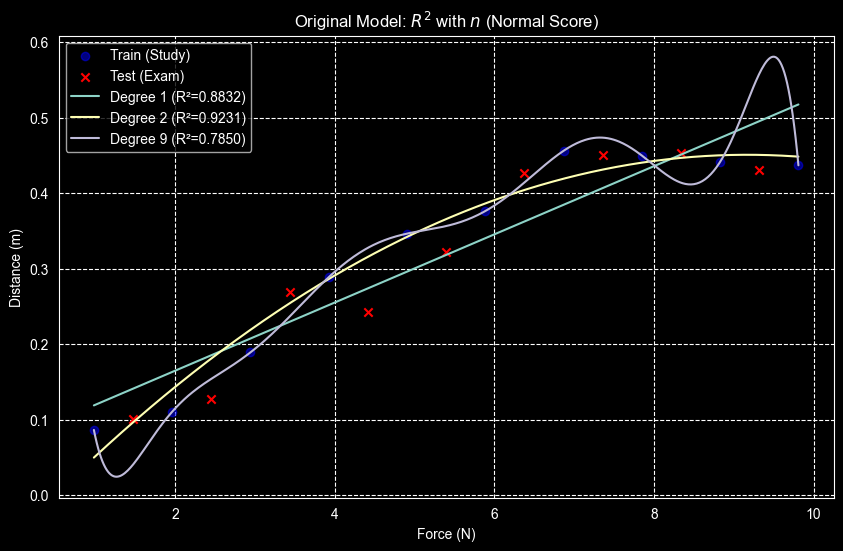

In [21]:
#exp 3 : Fine Capacity => 9차함수

import pylab
import numpy as np
import matplotlib.pyplot as plt

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):

    SSE = ((predicted - observed)**2).sum()
    MSE = SSE / len(observed)
    VAE = np.var(observed)
    return 1 - (MSE/VAR)

def split_and_test(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    train_forces, train_dist = forces[0::2], distances[0::2]
    test_forces, test_dist = forces[1::2], distances[1::2]

    # 1. 그래프 도화지 준비
    plt.figure(figsize=(10, 6))
    plt.scatter(train_forces, train_dist, color='blue', label='Train (Study)', alpha=0.5)
    plt.scatter(test_forces, test_dist, color='red', marker='x', label='Test (Exam)')

    # 선을 매끄럽게 그리기 위한 범위 설정
    x_range = np.linspace(min(forces), max(forces), 500)

    degrees = [1, 2, 9]

    for d in degrees:
        model = np.polyfit(train_forces, train_dist, d)
        est_test_dist = np.polyval(model, test_forces)

        # 성적 계산 (정상적인 R^2)
        r2 = rSquared(test_dist, est_test_dist)
        print(f"Degree {d} Model -> Test R^2 Score: {r2:.4f}")

        # 2. 모델의 예측선 그리기
        y_range = np.polyval(model, x_range)
        plt.plot(x_range, y_range, label=f'Degree {d} (R²={r2:.4f})')

    plt.title('Original Model: $R^2$ with $n$ (Normal Score)')
    plt.xlabel('Force (N)')
    plt.ylabel('Distance (m)')
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()

split_and_test('springData.csv')


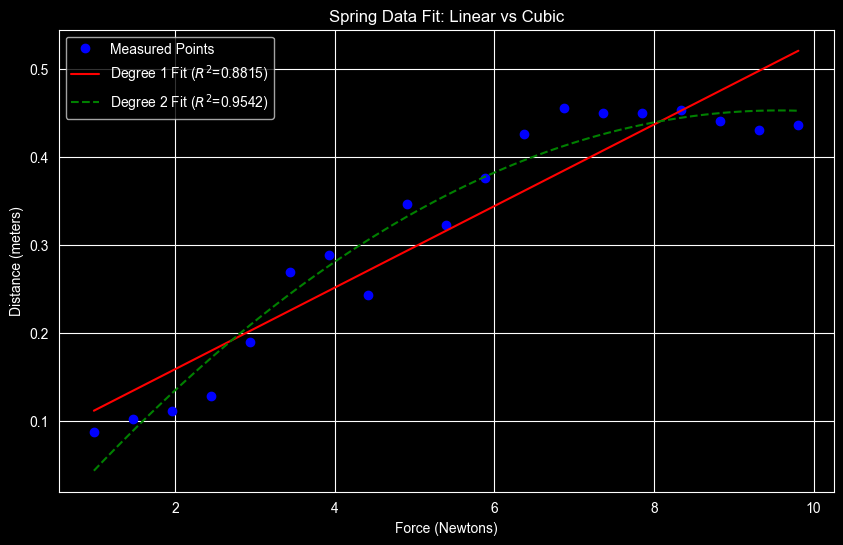

In [22]:
import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):
    SSE = ((predicted - observed)**2).sum()
    MSE = SSE/len(observed)
    VAR = np.var(observed)
    return 1 - (MSE/VAR)

def plot_fits(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 1. 그래프 설정
    pylab.figure(figsize=(10, 6))

    # 2. 실제 데이터 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')

    # 3. 모델 그리기 (1차 vs 3차)
    degrees = [1, 2]
    styles = ['r-', 'g--'] # 1차: 빨간 실선, 3차: 초록 점선

    for d, style in zip(degrees, styles):
        # 모델 생성 (학습)
        model = np.polyfit(forces, distances, d)

        # 시각화를 위해 예측값 생성 (Predict)
        # 그래프를 매끄럽게 그리기 위해 x축을 잘게 쪼갭니다 (linspace)
        est_x = np.linspace(min(forces), max(forces), 100)
        est_y = np.polyval(model, est_x)

        # R2 점수 계산 (원래 데이터 포인트 기준)
        pred_y_orig = np.polyval(model, forces)
        r2 = rSquared(distances, pred_y_orig)

        # 그래프에 추가
        pylab.plot(est_x, est_y, style, label=f'Degree {d} Fit ($R^2$={r2:.4f})')

    pylab.title('Spring Data Fit: Linear vs Cubic')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

# 실행
plot_fits('springData.csv')

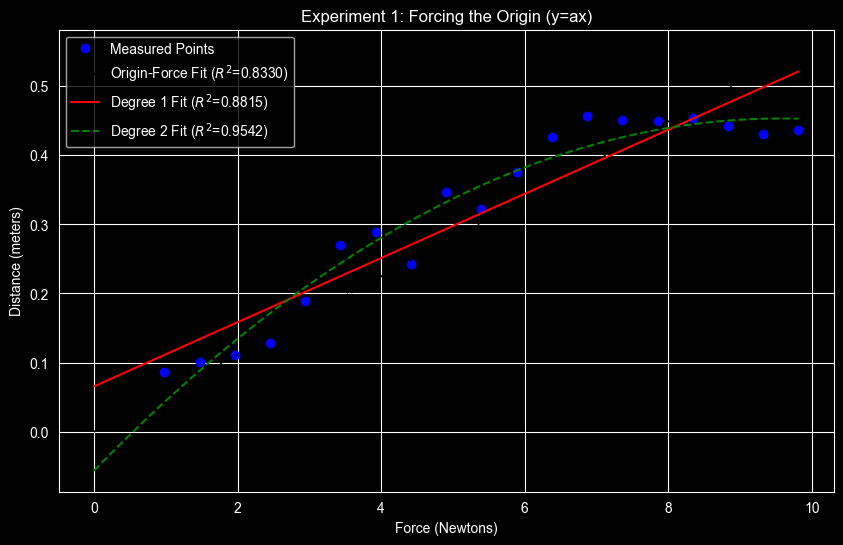

In [24]:
#exp 1 : 원점 강제 모델(Zero-Intercept Model)

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances, masses = [], []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):
    SSE = ((predicted - observed)**2).sum()
    MSE = SSE/len(observed)
    VAR = np.var(observed)
    return 1 - (MSE/VAR)

def plot_fits(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    pylab.figure(figsize=(10, 6))
    pylab.plot(forces, distances, 'bo', label='Measured Points')

    # --- [실험 1: 수식 직접 건드리기] ---
    # 원점을 지나도록 강제하는 공식: a = sum(F*d) / sum(F^2)
    # y = ax 형태의 직선을 만드는 가장 최적의 a를 찾는 수식입니다.
    k_direct = np.sum(forces * distances) / np.sum(forces**2)

    # 그래프를 그리기 위한 촘촘한 x축
    est_x = np.linspace(0, max(forces), 100) # 원점(0)부터 시작하게 변경

    # 1) 우리가 직접 만든 '원점 통과' 모델 (y = ax)
    y_origin_fit = k_direct * est_x
    r2_origin = rSquared(distances, k_direct * forces)
    pylab.plot(est_x, y_origin_fit, 'k:', label=f'Origin-Force Fit ($R^2$={r2_origin:.4f})')
    # -----------------------------------

    # 기존 polyfit 모델들 (자유로운 절편 허용)
    degrees = [1, 2]
    styles = ['r-', 'g--']
    for d, style in zip(degrees, styles):
        model = np.polyfit(forces, distances, d)
        est_y = np.polyval(model, est_x)
        r2 = rSquared(distances, np.polyval(model, forces))
        pylab.plot(est_x, est_y, style, label=f'Degree {d} Fit ($R^2$={r2:.4f})')

    pylab.title('Experiment 1: Forcing the Origin (y=ax)')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

plot_fits('springData.csv')


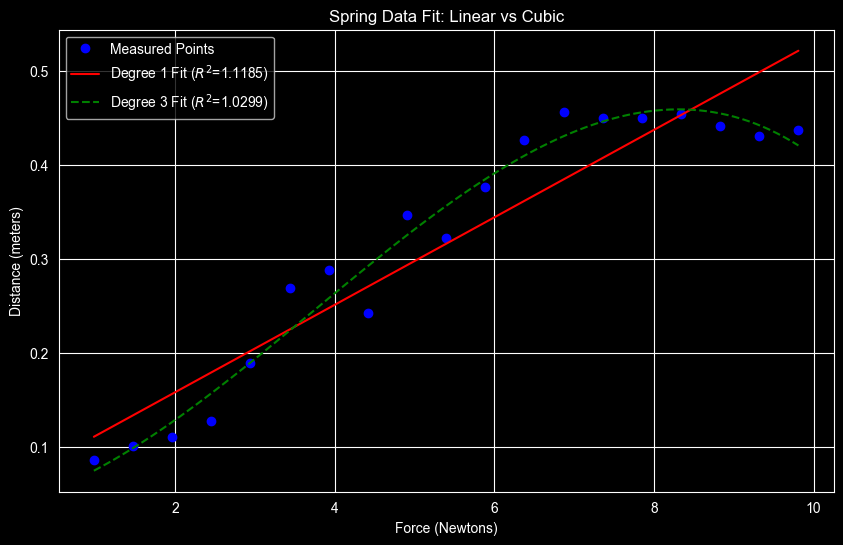

In [26]:
# exp 2 R**2 = 1 - MSE / VAR -> R**2 = 1 + MSE / VAR

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):
    SSE = ((predicted - observed)**2).sum()
    MSE = SSE/len(observed)
    VAR = np.var(observed)
    return 1 + (MSE/VAR)

def plot_fits(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 1. 그래프 설정
    pylab.figure(figsize=(10, 6))

    # 2. 실제 데이터 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')


    degrees = [1, 3]
    styles = ['r-', 'g--']

    for d, style in zip(degrees, styles):
        # 모델 생성 (학습)
        model = np.polyfit(forces, distances, d)

        # 시각화를 위해 예측값 생성 (Predict)
        # 그래프를 매끄럽게 그리기 위해 x축을 잘게 쪼갭니다 (linspace)
        est_x = np.linspace(min(forces), max(forces), 100)
        est_y = np.polyval(model, est_x)

        # R2 점수 계산 (원래 데이터 포인트 기준)
        pred_y_orig = np.polyval(model, forces)
        r2 = rSquared(distances, pred_y_orig)

        # 그래프에 추가
        pylab.plot(est_x, est_y, style, label=f'Degree {d} Fit ($R^2$={r2:.4f})')

    pylab.title('Spring Data Fit: Linear vs Cubic')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

# 실행
plot_fits('springData.csv')

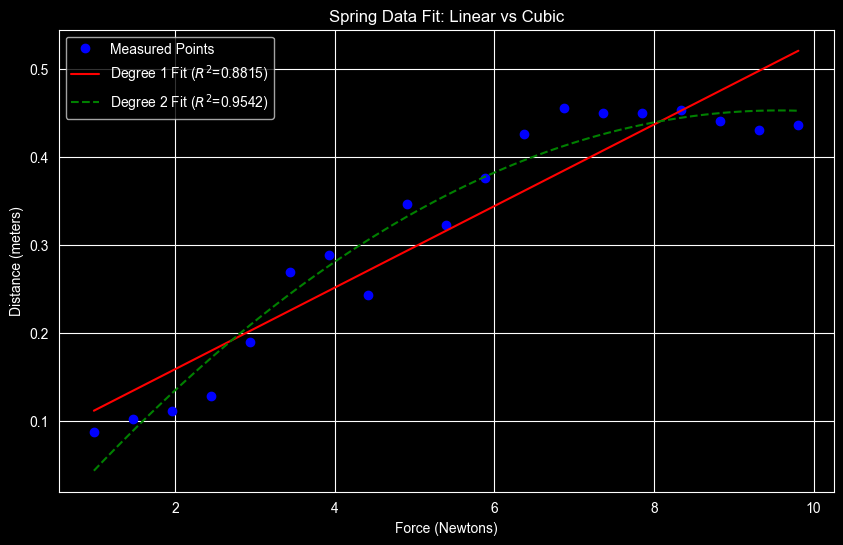

In [27]:
#exp 3

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):
    SSE = ((predicted - observed)**2).sum()
    MSE = SSE/len(observed)
    VAR = np.var(observed)
    return 1 - abs((MSE/VAR))

def plot_fits(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 1. 그래프 설정
    pylab.figure(figsize=(10, 6))

    # 2. 실제 데이터 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')

    # 3. 모델 그리기 (1차 vs 3차)
    degrees = [1, 2]
    styles = ['r-', 'g--'] # 1차: 빨간 실선, 3차: 초록 점선

    for d, style in zip(degrees, styles):
        # 모델 생성 (학습)
        model = np.polyfit(forces, distances, d)

        # 시각화를 위해 예측값 생성 (Predict)
        # 그래프를 매끄럽게 그리기 위해 x축을 잘게 쪼갭니다 (linspace)
        est_x = np.linspace(min(forces), max(forces), 100)
        est_y = np.polyval(model, est_x)

        # R2 점수 계산 (원래 데이터 포인트 기준)
        pred_y_orig = np.polyval(model, forces)
        r2 = rSquared(distances, pred_y_orig)

        # 그래프에 추가
        pylab.plot(est_x, est_y, style, label=f'Degree {d} Fit ($R^2$={r2:.4f})')

    pylab.title('Spring Data Fit: Linear vs Cubic')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

# 실행
plot_fits('springData.csv')

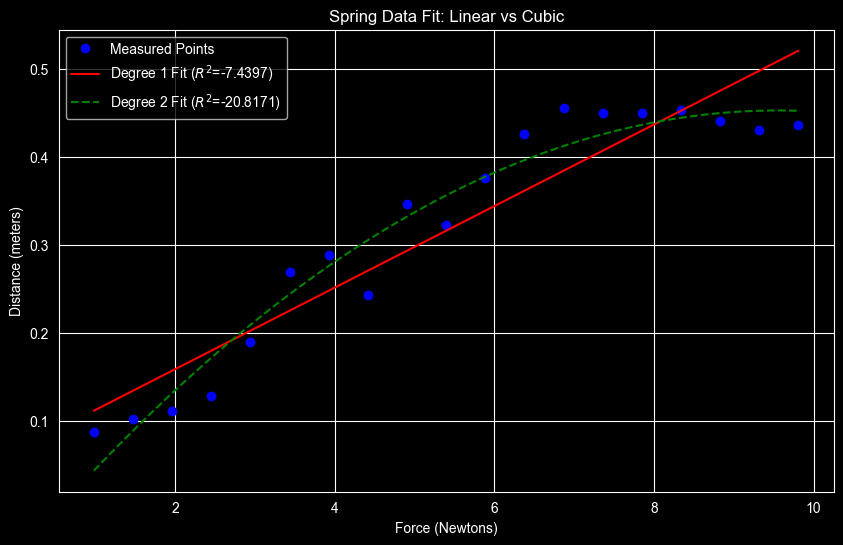

In [28]:
#exp 4

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):
    SSE = ((predicted - observed)**2).sum()
    MSE = SSE/len(observed)
    VAR = np.var(observed)
    return 1 - (VAR / MSE)

def plot_fits(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 1. 그래프 설정
    pylab.figure(figsize=(10, 6))

    # 2. 실제 데이터 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')

    # 3. 모델 그리기 (1차 vs 3차)
    degrees = [1, 2]
    styles = ['r-', 'g--'] # 1차: 빨간 실선, 3차: 초록 점선

    for d, style in zip(degrees, styles):
        # 모델 생성 (학습)
        model = np.polyfit(forces, distances, d)

        # 시각화를 위해 예측값 생성 (Predict)
        # 그래프를 매끄럽게 그리기 위해 x축을 잘게 쪼갭니다 (linspace)
        est_x = np.linspace(min(forces), max(forces), 100)
        est_y = np.polyval(model, est_x)

        # R2 점수 계산 (원래 데이터 포인트 기준)
        pred_y_orig = np.polyval(model, forces)
        r2 = rSquared(distances, pred_y_orig)

        # 그래프에 추가
        pylab.plot(est_x, est_y, style, label=f'Degree {d} Fit ($R^2$={r2:.4f})')

    pylab.title('Spring Data Fit: Linear vs Cubic')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

# 실행
plot_fits('springData.csv')

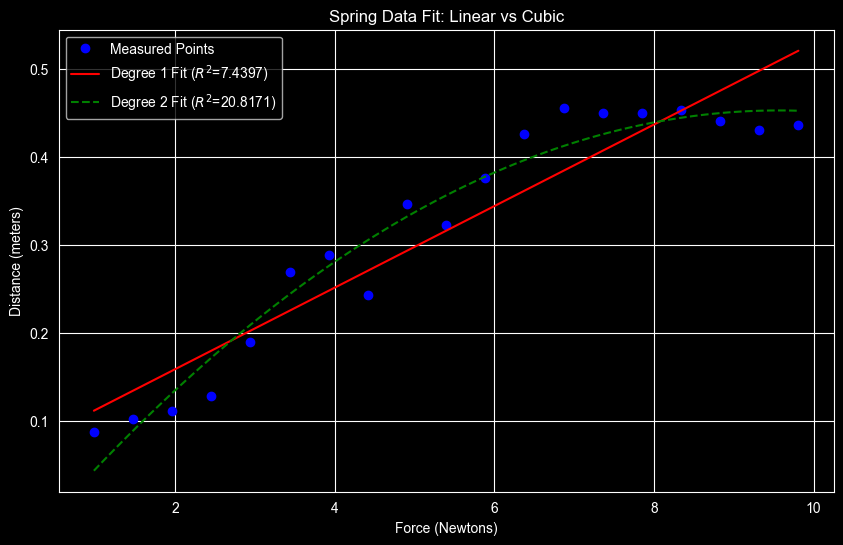

In [31]:
#exp 5

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def rSquared(observed, predicted):
    SSE = ((predicted - observed)**2).sum()
    MSE = SSE/len(observed)
    VAR = np.var(observed)
    # return 1 - abs((VAR / MSE)) : 동일한 값을 출력한다. python의 우선순위로 인해서
    return abs(1 - VAR/MSE)

def plot_fits(fileName):
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 1. 그래프 설정
    pylab.figure(figsize=(10, 6))

    # 2. 실제 데이터 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')

    # 3. 모델 그리기 (1차 vs 3차)
    degrees = [1, 2]
    styles = ['r-', 'g--'] # 1차: 빨간 실선, 3차: 초록 점선

    for d, style in zip(degrees, styles):
        # 모델 생성 (학습)
        model = np.polyfit(forces, distances, d)

        # 시각화를 위해 예측값 생성 (Predict)
        # 그래프를 매끄럽게 그리기 위해 x축을 잘게 쪼갭니다 (linspace)
        est_x = np.linspace(min(forces), max(forces), 100)
        est_y = np.polyval(model, est_x)

        # R2 점수 계산 (원래 데이터 포인트 기준)
        pred_y_orig = np.polyval(model, forces)
        r2 = rSquared(distances, pred_y_orig)

        # 그래프에 추가
        pylab.plot(est_x, est_y, style, label=f'Degree {d} Fit ($R^2$={r2:.4f})')

    pylab.title('Spring Data Fit: Linear vs Cubic')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

# 실행
plot_fits('springData.csv')